In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [22]:
foods = pd.read_csv('./Data_formatted/nv_df.csv', index_col='Unnamed: 0')
constraints = pd.read_csv('./Data_formatted/constraints.csv', 
                          index_col = 'Unnamed: 0')

Hypothetical clusters:\
Grains, nuts/seeds, fruits, vegetables, meat/eggs/dairy

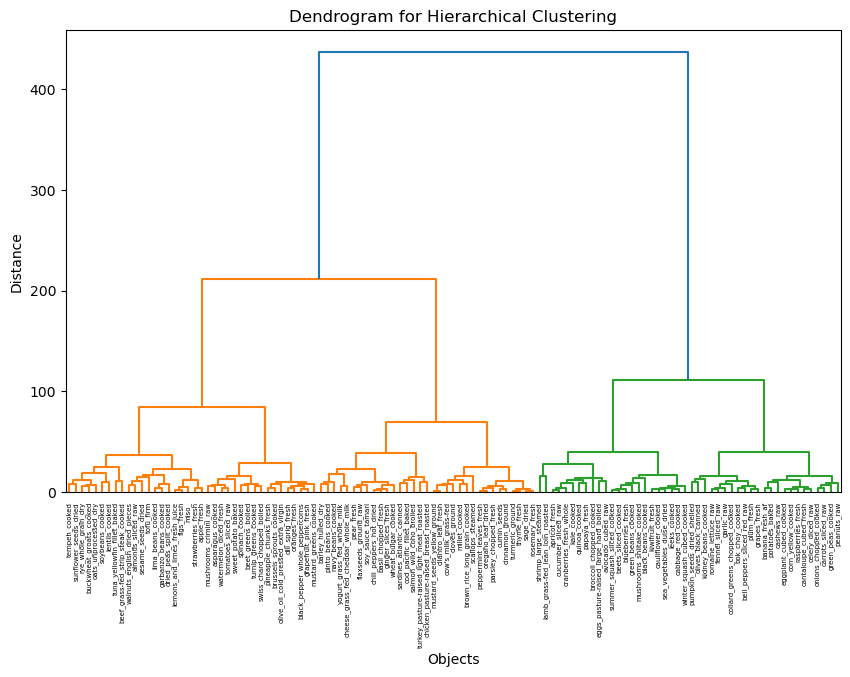

asparagus_cooked                76
avocado_cubed_raw               83
beet_greens_boiled              69
beets_sliced_cooked            109
bell_peppers_sliced_red_raw     91
                              ... 
peppermint_leaves_fresh         13
rosemary_fresh                   6
sage_dried                       1
thyme_fresh                      2
turmeric_ground                  0
Name: Cluster, Length: 117, dtype: int64


In [35]:
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
clustering.fit(foods_normalized)

# Plot the dendrogram
linked = linkage(foods_normalized, method='ward')  # Using Ward's linkage method
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', labels=foods_normalized.index, distance_sort='descending', show_leaf_counts=True)
plt.xlabel('Objects')
plt.ylabel('Distance')
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Add the cluster labels to the DataFrame
foods_normalized['Cluster'] = clustering.labels_

# Print the DataFrame with cluster labels
print(foods_normalized['Cluster'])

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

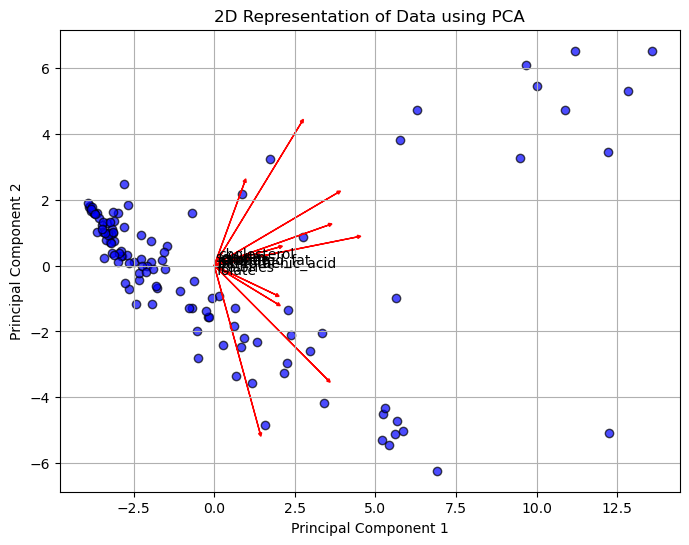

Explained Variance Ratio: [0.40871188 0.13837846 0.08443172 0.05413272 0.03915137 0.02865185
 0.0265379  0.02373278 0.02320578 0.02242841]


In [30]:
df = foods
scaler = StandardScaler()
df_normalized = scaler.fit_transform(foods)

# Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df_normalized)

# Plot the 2D representation of the data
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c='b', edgecolors='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Representation of Data using PCA')
plt.grid(True)
for i in range(len(pca.components_)):
    plt.arrow(0, 0, pca.components_[0, i]*20, pca.components_[1, i]*20,
              head_width=0.1, head_length=0.1, fc='r', ec='r')
    plt.text(pca.components_[0, i], pca.components_[1, i], df.columns[i], fontsize=10)

plt.show()

# Get the explained variance ratio of each principal component (feature importance)
explained_var_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_var_ratio)

In [32]:
pca.explained_variance_

array([18.96282169,  6.42028337,  3.91734047,  2.51157149,  1.81648842,
        1.3293469 ,  1.23126714,  1.10111898,  1.0766684 ,  1.04060111])